## Importing Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading and setting up the dataset


Here what we are doing is trying to create a dataframe combining both train and test dataset so the task like preprocessing and feature engineering could be done at once.
in order to combine them first we create a dummy column named SalePrice which will probably be missing on test dataset and initialize all its value to 0. 
this will create equal number of columns and then we can concatinate them vertically.

In [6]:
df_1= pd.read_csv('dataset/train.csv')
df_2 = pd.read_csv('dataset/test.csv')
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1,df_2],axis=0)
df=df.set_index('Id') # unique id to the rows
df


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1             60       RL         65.0     8450   Pave   NaN      Reg   
2             20       RL         80.0     9600   Pave   NaN      Reg   
3             60       RL         68.0    11250   Pave   NaN      IR1   
4             70       RL         60.0     9550   Pave   NaN      IR1   
5             60       RL         84.0    14260   Pave   NaN      IR1   
...          ...      ...          ...      ...    ...   ...      ...   
2915         160       RM         21.0     1936   Pave   NaN      Reg   
2916         160       RM         21.0     1894   Pave   NaN      Reg   
2917          20       RL        160.0    20000   Pave   NaN      Reg   
2918          85       RL         62.0    10441   Pave   NaN      Reg   
2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
Id                                    ...                                      
1            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
3            Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4            Lvl    AllPub    Corner  ...        0    NaN    NaN         NaN   
5            Lvl    AllPub       FR2  ...        0    NaN    NaN         NaN   
...          ...       ...       ...  ...      ...    ...    ...         ...   
2915         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2916         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2917         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2918         Lvl    AllPub    Inside  ...        0    NaN  MnPrv        Shed   
2919         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                               
1          0      2    2008        WD         Normal     208500  
2          0      5    2007        WD         Normal     181500  
3          0      9    2008        WD         Normal     223500  
4          0      2    2006        WD        Abnorml     140000  
5          0     12    2008        WD         Normal     250000  
...      ...    ...     ...       ...            ...        ...  
2915       0      6    2006        WD         Normal          0  
2916       0      4    2006        WD        Abnorml          0  
2917       0      9    2006        WD        Abnorml          0  
2918     700      7    2006        WD         Normal          0  
2919       0     11    2006        WD         Normal          0  

[2919 rows x 80 columns]

## Data Preprocessing

### Missing Values
1. First we will address missing values.

In [15]:
print((df.isnull().sum())) #no of null values in each column
print("\n")
print((df.isnull().sum())>0) #columns with null values more than 0

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


MSSubClass       False
MSZoning          True
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType          True
SaleCondition    False
SalePrice        False
Length: 80, dtype: bool


New df with all the columns that contains null values

In [20]:
df_null = df[df.isnull().sum()[df.isnull().sum()>0].index] 
df_null

MSZoning  LotFrontage Alley Utilities Exterior1st Exterior2nd MasVnrType  \
Id                                                                              
1          RL         65.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
2          RL         80.0   NaN    AllPub     MetalSd     MetalSd        NaN   
3          RL         68.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
4          RL         60.0   NaN    AllPub     Wd Sdng     Wd Shng        NaN   
5          RL         84.0   NaN    AllPub     VinylSd     VinylSd    BrkFace   
...       ...          ...   ...       ...         ...         ...        ...   
2915       RM         21.0   NaN    AllPub     CemntBd     CmentBd        NaN   
2916       RM         21.0   NaN    AllPub     CemntBd     CmentBd        NaN   
2917       RL        160.0   NaN    AllPub     VinylSd     VinylSd        NaN   
2918       RL         62.0   NaN    AllPub     HdBoard     Wd Shng        NaN   
2919       RL         74.0   NaN    AllPub     HdBoard     HdBoard    BrkFace   

      MasVnrArea BsmtQual BsmtCond  ... GarageYrBlt GarageFinish  GarageCars  \
Id                                  ...                                        
1          196.0       Gd       TA  ...      2003.0          RFn         2.0   
2            0.0       Gd       TA  ...      1976.0          RFn         2.0   
3          162.0       Gd       TA  ...      2001.0          RFn         2.0   
4            0.0       TA       Gd  ...      1998.0          Unf         3.0   
5          350.0       Gd       TA  ...      2000.0          RFn         3.0   
...          ...      ...      ...  ...         ...          ...         ...   
2915         0.0       TA       TA  ...         NaN          NaN         0.0   
2916         0.0       TA       TA  ...      1970.0          Unf         1.0   
2917         0.0       TA       TA  ...      1960.0          Unf         2.0   
2918         0.0       Gd       TA  ...         NaN          NaN         0.0   
2919        94.0       Gd       TA  ...      1993.0          Fin         3.0   

     GarageArea  GarageQual  GarageCond  PoolQC  Fence  MiscFeature  SaleType  
Id                                                                             
1         548.0          TA          TA     NaN    NaN          NaN        WD  
2         460.0          TA          TA     NaN    NaN          NaN        WD  
3         608.0          TA          TA     NaN    NaN          NaN        WD  
4         642.0          TA          TA     NaN    NaN          NaN        WD  
5         836.0          TA          TA     NaN    NaN          NaN        WD  
...         ...         ...         ...     ...    ...          ...       ...  
2915        0.0         NaN         NaN     NaN    NaN          NaN        WD  
2916      286.0          TA          TA     NaN    NaN          NaN        WD  
2917      576.0          TA          TA     NaN    NaN          NaN        WD  
2918        0.0         NaN         NaN     NaN  MnPrv         Shed        WD  
2919      650.0          TA          TA     NaN    NaN          NaN        WD  

[2919 rows x 34 columns]

Lets visualize the heatmap of missing values in the dataset.
We can see that there are many columns with missing values. We will address them one by one.

<Axes: ylabel='Id'>

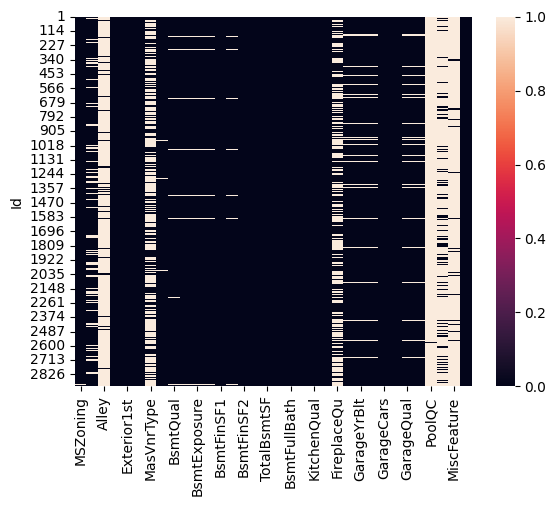

In [22]:
sns.heatmap(data=df_null.isnull())

Dropping the columns with more than 1100 missing values.

<Axes: ylabel='Id'>

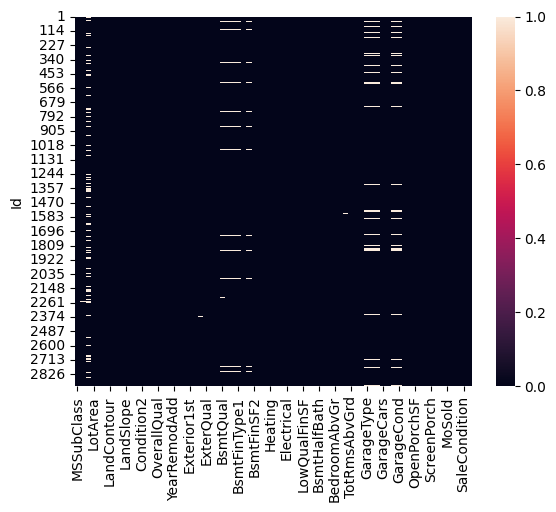

In [26]:
df_objects = df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum()>1100].index],axis=1)
sns.heatmap(data=df.isnull())